# Proyecto de Data Science y Machine Learning
------------------

## Reseñas de Disneyland - Clasificación y análisis de sentimientos

In [1]:
# Imports
import pandas as pd # Manipulación de datos
import matplotlib.pyplot as plt # Graficos
import seaborn as sns # Graficos
import nltk # Kit de herramientas de procesamiento de lenguaje natural.
nltk.download("vader_lexicon")

#Librerias para entrenar al modelo
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

#Libreria para utilizar métricas
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Leemos los datos con el encoding adecuado y los almacenamos en una variable
data = pd.read_csv( "DisneylandReviews.csv", encoding = "latin-1" )

In [3]:
data.head(4)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong


In [4]:
print('Número de filas en data: ', data.shape[0])

Número de filas en data:  42656


In [5]:
# Revisamos la información general de nuestro dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


El dataset tiene 6 columnas, 2 de tipo entero y cuatro de tipo objeto

In [6]:
'''
Obtenemos los valores para nuestro rating de menor a mayor 
para saber la cantidad de personas que dieron cada calificación
'''
data["Rating"].value_counts( ascending = True )

1     1499
2     2127
3     5109
4    10775
5    23146
Name: Rating, dtype: int64

Podemos observar que la mayoria de personas dan una calificación entre 4 y 5 estrellas, tambien existen un pequeño numero de calificaciones bajas.

## Gráfico de barras de las Estrellas de Disneyland con Matplotlib

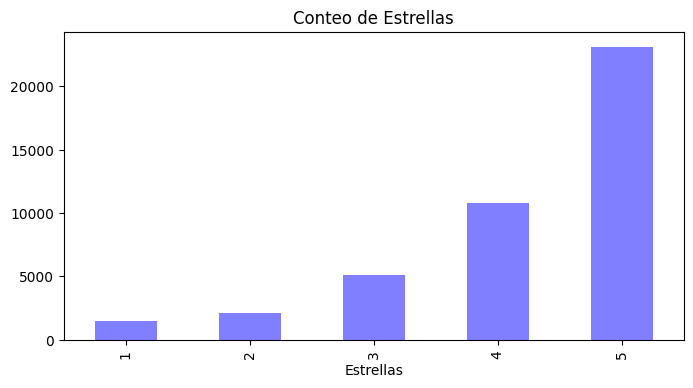

In [7]:
columnaRatingASC = data["Rating"].value_counts( ascending = True )
columnaRatingASC.plot( 
    kind="bar", 
    title="Conteo de Estrellas", 
    figsize=(8, 4), 
    color="Blue", 
    alpha = 0.5, 
    xlabel="Estrellas" )
plt.show()

## Gráfico circular de las Estrellas de Disneyland con Matplotlib 

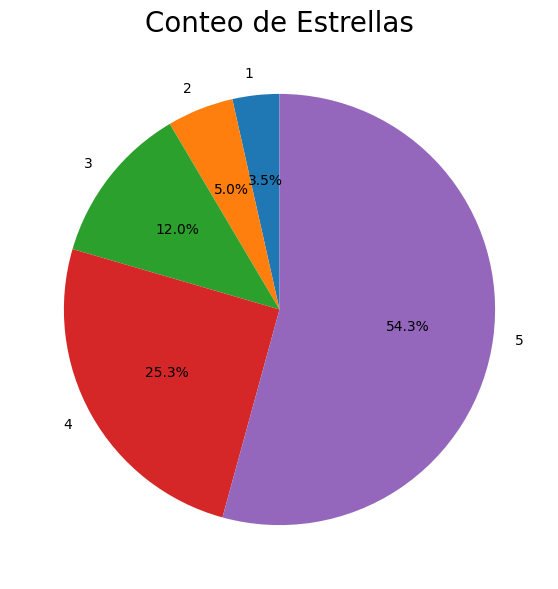

In [8]:
columnaRating = data["Rating"].value_counts( ascending = True )

fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(columnaRating, 
       labels=[1, 2, 3, 4, 5], 
       autopct='%1.1f%%', 
       startangle=90)

ax.set_title("Conteo de Estrellas", fontsize = 20,)

plt.show()


## Gráfico de barras de la cantidad de reseñas por sucursal de Disneyland con Seaborn

<AxesSubplot:xlabel='count', ylabel='Branch'>

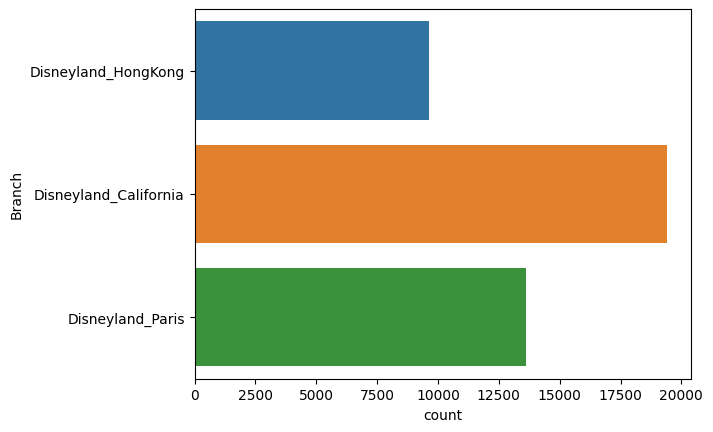

In [9]:
sns.countplot( 
    y = "Branch", 
    data = data, 
    linewidth = 4, 
    # edgecolor="black",
    # color="#98ff98"
    )

## ¿Qué sucursal está mejor valorada?

Como podemos ver, en primer lugar está Disneyland_California, seguido de Disneyland_HongKong y la peor valoración promedio es de Disneyland_Paris.

<AxesSubplot:xlabel='Rating', ylabel='Branch'>

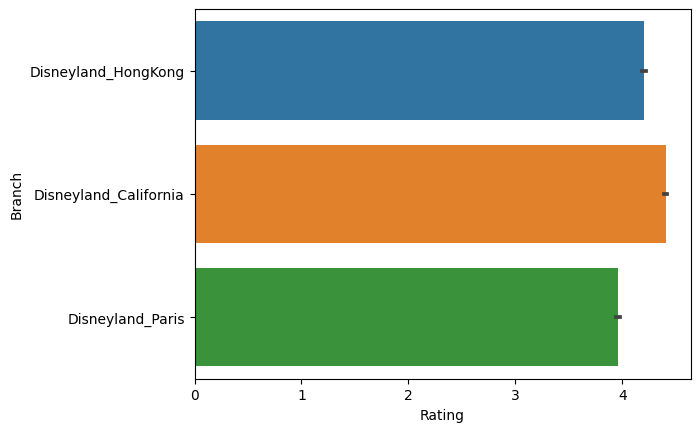

In [10]:
# Seaborn
sns.barplot( y = data["Branch"], x = data["Rating"])

## Descartaremos las columnas innecesarias para trabajar solo con valoraciones y reseñas de textos.

In [11]:
# Observamos las columnas del dataset
data.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [12]:
# Borramos las columnas con el índice 0, 2, 3, 5.
data.drop( data.columns[[0, 2, 3, 5]], axis = 1, inplace = True )

In [13]:
data.head(4)

,Rating,Review_Text
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...


In [14]:
# Cambiamos el orden de las columnas
data = data[["Review_Text", "Rating"]]

In [15]:
data

,Review_Text,Rating
0,If you've ever been to Disneyland anywhere you...,4
1,Its been a while since d last time we visit HK...,4
2,Thanks God it wasn t too hot or too humid wh...,4
3,HK Disneyland is a great compact park. Unfortu...,4
4,"the location is not in the city, took around 1...",4
...,...,...
42651,i went to disneyland paris in july 03 and thou...,5
42652,2 adults and 1 child of 11 visited Disneyland ...,5
42653,My eleven year old daughter and myself went to...,5
42654,"This hotel, part of the Disneyland Paris compl...",4


## Buscamos valores repetidos, null, outlier, etc (limpiamos el dataset)

* Valores duplicados

In [16]:
# Valores duplicados
data.duplicated().sum()

23

In [17]:
# Hay algunos valores repetidos y tenemos que eliminarlos con drop_duplicates()
data.drop_duplicates( inplace = True )

In [18]:
# Comprobamos nuevamente si hay valores repetidos
data.duplicated().sum() 
# Ya no tenemos valores duplicados en el dataset

0

* Valores null

In [19]:
# Valores null
data.isnull().sum() #En este caso no tenemos

Review_Text    0
Rating         0
dtype: int64

* Campos vacios

In [20]:
# Recorremos con un for la columna "Review_Text" para saber si hay espacios en blanco
espaciosBlancos = []

for index in data["Review_Text"]:
    # Si todos los caracteres en la cadena son espacios en blanco
    if index.isspace() == True:
        espaciosBlancos.append( index )


In [21]:
# No tenemos Reseñas vacias
espaciosBlancos

[]

In [22]:
'''
Ahora vamos a definir una función que etiquetará una valoración 
como positiva si su puntaje es tres o más, y como negativa si es 
menor a tres.
'''

def transformacion( calificacion ):
    
    res = []

    for index in calificacion:
        if index > 2 and index <= 5:
            res.append("Positive")
        elif index > 0 and index <= 2:
            res.append("Negative")
    return res

estrellasTransformadas = transformacion( data["Rating"] )

In [23]:
# Comprobamos los valores
estrellasTransformadas[:4]

['Positive', 'Positive', 'Positive', 'Positive']

In [24]:
# Agregamos una nueva columna al dataset
data["Rating_posorneg"] = estrellasTransformadas

In [25]:
# Comprobamos si se agrego la nueva columna
data.head(10)

,Review_Text,Rating,Rating_posorneg
0,If you've ever been to Disneyland anywhere you...,4,Positive
1,Its been a while since d last time we visit HK...,4,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive
4,"the location is not in the city, took around 1...",4,Positive
5,"Have been to Disney World, Disneyland Anaheim ...",3,Positive
6,Great place! Your day will go by and you won't...,5,Positive
7,Think of it as an intro to Disney magic for th...,3,Positive
8,"Feel so let down with this place,the Disneylan...",2,Negative
9,I can go on talking about Disneyland. Whatever...,5,Positive


## Usaremos la libreria NLTK para nuestro análisis de sentimientos.

In [26]:
'''NLTK (herramienta especialmente util para análisis de sentimientos 
expresados ​​en las redes sociales)
'''

# Importamos el analizador de intensidad de sentimiento y lo instanciamos
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentanalyze = SentimentIntensityAnalyzer()

La función polarity_scores() del módulo SentimentIntensityAnalyzer de la librería NLTK es una herramienta de análisis de sentimientos que devuelve un diccionario con cuatro valores:

* 'neg': valor de la polaridad negativa de la oración.
* 'neu': valor de la polaridad neutra de la oración.
* 'pos': valor de la polaridad positiva de la oración.
* 'compound': valor de la polaridad general de la oración, que oscila entre -1 (muy negativa) y +1 (muy positiva).

### Ejemplo rapido de como funciona

* Review Positiva

In [27]:
review = "This is a nice day. I love this day"
sentanalyze.polarity_scores(review)

# Resultado Positivo: {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.7906}

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.7906}

* Review Negativa

In [28]:
review = "I didn't liked the disneyland. I am never coming back again"
sentanalyze.polarity_scores( review )

# Resultado Negativo: {'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.3252}

{'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.3252}

In [29]:
''' 
Creamos una nueva columna llamada 'Score' en la cual guardamos el diccionario de 
análisis polar resultante de aplicar la función 'sentanalyze.polarity_scores' al 
parámetro 'review'. En este caso, cada línea de la columna 'Review_Text' se 
analiza y se guarda su diccionario de análisis polar en la nueva columna 'Score'".
'''
data["Scores"] = data["Review_Text"].apply( lambda review: sentanalyze.polarity_scores(review) )

In [30]:
# Visualizamos la columna 'Scores' con el análisis polar
data["Scores"].head(4)

0    {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...
1    {'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...
2    {'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...
3    {'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...
Name: Scores, dtype: object

In [31]:
# Creamos una nueva columna 'compound' y obtenermos el valor compuesto del análisis polar
data["compound"] = data["Scores"].apply( lambda x:x ["compound"] )

In [32]:
# Visualizamos el valor compuesto
data.head(4)

,Review_Text,Rating,Rating_posorneg,Scores,compound
0,If you've ever been to Disneyland anywhere you...,4,Positive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069
1,Its been a while since d last time we visit HK...,4,Positive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901
2,Thanks God it wasn t too hot or too humid wh...,4,Positive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920
3,HK Disneyland is a great compact park. Unfortu...,4,Positive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489


### Agregamos una nueva columna donde clasificamos las puntuaciones compuestas de las reseñas como positivas si el valor es mayor a cero y como negativas si el valor es menor a cero.


In [33]:
data["compound_porsorneg"] = data["compound"].apply( lambda score:"Positive" if score >=0 else "Negative" )

In [34]:
# Visualizamos la columna con la clasificación del valor compuesto
data.head(4)

,Review_Text,Rating,Rating_posorneg,Scores,compound,compound_porsorneg
0,If you've ever been to Disneyland anywhere you...,4,Positive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069,Positive
1,Its been a while since d last time we visit HK...,4,Positive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489,Positive


## Clasificación de texto

Borraremos las columnas que ya no necesitamos y conservaremos solo las reseñas, valoración de texto, las valoración positivas y la clasificación del texto.

In [35]:
data = data[["Review_Text", "Rating", "Rating_posorneg"]]

In [36]:
# Visualizamos nuestra nueva versión de nuestros datos.
data.head(10)

,Review_Text,Rating,Rating_posorneg
0,If you've ever been to Disneyland anywhere you...,4,Positive
1,Its been a while since d last time we visit HK...,4,Positive
2,Thanks God it wasn t too hot or too humid wh...,4,Positive
3,HK Disneyland is a great compact park. Unfortu...,4,Positive
4,"the location is not in the city, took around 1...",4,Positive
5,"Have been to Disney World, Disneyland Anaheim ...",3,Positive
6,Great place! Your day will go by and you won't...,5,Positive
7,Think of it as an intro to Disney magic for th...,3,Positive
8,"Feel so let down with this place,the Disneylan...",2,Negative
9,I can go on talking about Disneyland. Whatever...,5,Positive


## Entrenamos a nuestro modelo

### Empezamos la clasificaión del texto instanciando nuestras variables X, Y

In [37]:
# Cargamos los datos del conjunto de datos en dos variables
X = data["Review_Text"] # variable independiente
y = data["Rating_posorneg"] # variable dependiente

In [38]:
# Dividimos el escalar en datos de prueba 33% y de datos de entrenamiento 67%.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33 )

In [39]:
'''
Crea un pipeline que realiza la vectorización de los datos 
utilizando el método TF-IDF y la clasificación con LinearSVC

* Un pipeline de Machine Learning consta de varias etapas, que pueden incluir:
    1. Preprocesamiento de datos
    2. Extracción de características
    3. Selección de modelos
    4. Evaluación del modelo
    5. Despliegue del modelo

* La vectorización de texto es el proceso de convertir el texto sin formato 
en una representación numérica para que los algoritmos de aprendizaje automático:

    1. La primera etapa del pipeline es el TfidfVectorizer, que se utiliza 
    para convertir el texto en una representación numérica, es decir, para 
    vectorizar el texto. La técnica de vectorización utilizada se llama 
    Tfidf (Term frequency-inverse document frequency) y se utiliza para 
    asignar un peso a cada palabra en función de su frecuencia en el texto 
    y en el corpus completo.

    2. La segunda etapa del pipeline es el LinearSVC, que es un modelo de 
    aprendizaje automático que se utiliza para clasificar el texto vectorizado 
    en positivo o negativo. LinearSVC se utiliza para clasificar datos en dos 
    clases y funciona encontrando el hiperplano que mejor separa los datos en 
    esas dos clases.
'''

textclf = Pipeline([
                    ( "tfidf", TfidfVectorizer() ),
                    ( "clf", LinearSVC() )
                    ] )

Entrenamos nuestro modelo

In [40]:
# Entrenar el modelo
textclf.fit( X_train, y_train )

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

Utilizamos métricas para comprobar el rendimiento del modelo

In [41]:
# Realizamos predicciones utilizando el conjunto de prueba.
preds = textclf.predict( X_test )

In [42]:
# Calculamos la exactitud del modelo comparando las respuestas con las predicciones.
accuracy_score(y_test, preds) 

0.9380908380126519

In [43]:
# Calculamos la matriz de confusión
cm = confusion_matrix( y_test, preds )
cm

array([[  651,   578],
       [  293, 12547]], dtype=int64)

In [44]:
# Configuramos las dimensiones de la figura
matplotlib.rc( "figure", figsize=(4, 4) )

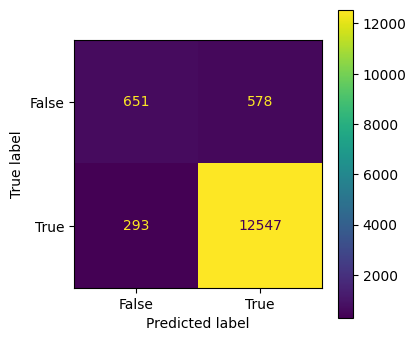

In [45]:
# Creamos una visualización de la matriz de confusión
cm_display = ConfusionMatrixDisplay( confusion_matrix=cm, display_labels = [False, True] )
cm_display.plot()
plt.show()

### Probamos el modelo

In [46]:
newreview = [ ("Disneyland was perfect. I liked it so  much") ]

In [47]:
# Realizamos la predicción de sentimiento de la nueva reseña
textclf.predict( newreview )

array(['Positive'], dtype=object)

In [48]:
# Resultado de la predicción de la nueva reseña.
textclf.predict( newreview )[0]

'Positive'